In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model 

In [63]:
df=pd.read_csv('girlf.csv')
df

,name,height,bsize,asize,vsize
0,Dipika,5.30,36,36,5.5
1,Ashmita,4.11,32,30,4.0
2,Ashma,5.20,35,40,5.0
3,Malika,5.30,40,50,4.5
4,Sampada,5.10,42,52,5.0
5,sofia,5.20,45,40,5.1
6,rasmita,4.11,32,32,6.0


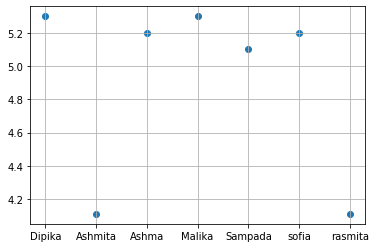

In [64]:
df
plt.scatter(df.name,df.height)
plt.grid()

In [16]:
model=linear_model.LinearRegression()

In [17]:
model.fit(df[['height']],df.vsize)

LinearRegression()

In [18]:
model.predict([[5.1]])

array([5.01756172])

In [20]:
import pickle

In [22]:
with open('model_pickel','wb') as f:
    pickle.dump(model,f)

In [27]:
with open('model_pickel','rb') as f:
    model=pickle.load(f)
   

In [28]:
model.predict([[5.1]])

array([5.01756172])

In [31]:
dumm=pd.get_dummies(df['name'])

In [37]:
merge=pd.concat([df,dumm],axis=1)

In [38]:
merge

,name,height,bsize,asize,vsize,Ashma,Ashmita,Dipika,Malika,Sampada,rasmita,sofia
0,Dipika,5.30,36,36,5.5,0,0,1,0,0,0,0
1,Ashmita,4.11,32,30,4.0,0,1,0,0,0,0,0
2,Ashma,5.20,35,40,5.0,1,0,0,0,0,0,0
3,Malika,5.30,40,50,4.5,0,0,0,1,0,0,0
4,Sampada,5.10,42,52,5.0,0,0,0,0,1,0,0
5,sofia,5.20,45,40,5.1,0,0,0,0,0,0,1
6,rasmita,4.11,32,32,6.0,0,0,0,0,0,1,0


In [41]:
final=merge.drop(['name'],axis=1)

In [42]:
final

,height,bsize,asize,vsize,Ashma,Ashmita,Dipika,Malika,Sampada,rasmita,sofia
0,5.30,36,36,5.5,0,0,1,0,0,0,0
1,4.11,32,30,4.0,0,1,0,0,0,0,0
2,5.20,35,40,5.0,1,0,0,0,0,0,0
3,5.30,40,50,4.5,0,0,0,1,0,0,0
4,5.10,42,52,5.0,0,0,0,0,1,0,0
5,5.20,45,40,5.1,0,0,0,0,0,0,1
6,4.11,32,32,6.0,0,0,0,0,0,1,0


In [44]:
reg=linear_model.LinearRegression()

In [46]:
reg.fit(final[['height','bsize','asize']],final.vsize)

LinearRegression()

In [48]:
reg.predict([[5.2,32,45]])

array([4.96898244])

In [49]:
reg.score(final[['height','bsize','asize']],final.vsize)

0.05102858863950677

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [57]:
dfle=df
dfle.name=le.fit_transform(dfle.name)

In [58]:
dfle


,name,height,bsize,asize,vsize
0,2,5.30,36,36,5.5
1,1,4.11,32,30,4.0
2,0,5.20,35,40,5.0
3,3,5.30,40,50,4.5
4,4,5.10,42,52,5.0
5,6,5.20,45,40,5.1
6,5,4.11,32,32,6.0


In [91]:
X=df[['height','bsize','asize']]
y=df[['vsize']]

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=10)

In [94]:
X_train
X_test

,height,bsize,asize
2,5.2,35,40


In [95]:
df

,name,height,bsize,asize,vsize
0,Dipika,5.30,36,36,5.5
1,Ashmita,4.11,32,30,4.0
2,Ashma,5.20,35,40,5.0
3,Malika,5.30,40,50,4.5
4,Sampada,5.10,42,52,5.0
5,sofia,5.20,45,40,5.1
6,rasmita,4.11,32,32,6.0


In [96]:
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [100]:
reg.predict(X_test)

array([[5.1632091]])

In [102]:
y_test

,vsize
2,5.0


In [105]:
reg.score(X_test,y_test)

/home/san/.local/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan